In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)


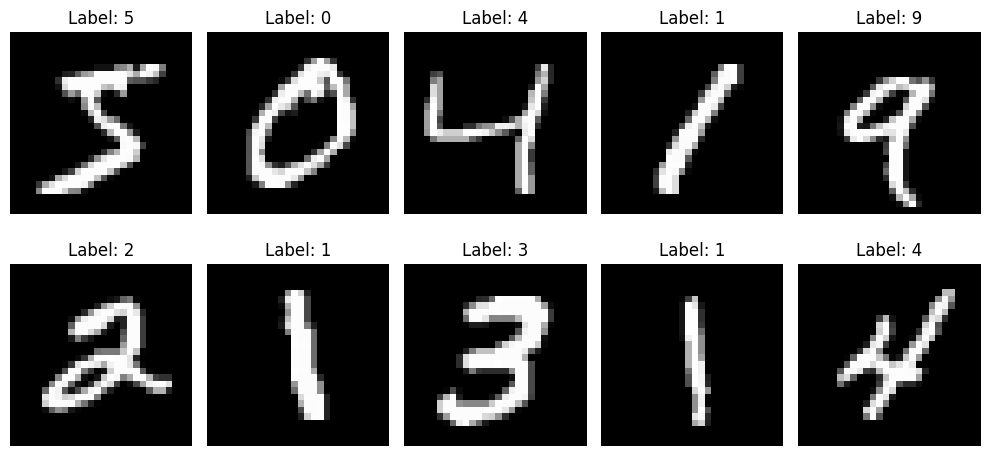

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)

# Visualize a few digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Split training into training + validation
x_train_full = x_train
y_train_full = y_train

x_train = x_train_full[:50000]
y_train = y_train_full[:50000]

x_val = x_train_full[50000:]
y_val = y_train_full[50000:]

print("New train set:", x_train.shape)
print("Validation set:", x_val.shape)


New train set: (50000, 28, 28)
Validation set: (10000, 28, 28)


In [ ]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
training_history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8869 - loss: 0.3911 - val_accuracy: 0.9642 - val_loss: 0.1159
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9708 - loss: 0.0930 - val_accuracy: 0.9720 - val_loss: 0.0990
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9823 - loss: 0.0575 - val_accuracy: 0.9742 - val_loss: 0.0829
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9864 - loss: 0.0418 - val_accuracy: 0.9746 - val_loss: 0.0886
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9898 - loss: 0.0309 - val_accuracy: 0.9774 - val_loss: 0.0826
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9923 - loss: 0.0227 - val_accuracy: 0.9771 - val_loss: 0.0882
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9924 - loss: 0.0217 - val_accuracy: 0.9749 - val_loss: 0.1087
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9932 - loss: 0.0214 -

In [ ]:
import pandas as pd

history_df = pd.DataFrame(training_history.history)
print(history_df)

   accuracy      loss  val_accuracy  val_loss
0   0.93354  0.224949        0.9642  0.115884
1   0.97192  0.091551        0.9720  0.099006
2   0.98112  0.059995        0.9742  0.082942
3   0.98508  0.045534        0.9746  0.088552
4   0.98836  0.035167        0.9774  0.082603
5   0.99102  0.026951        0.9771  0.088221
6   0.99194  0.023159        0.9749  0.108740
7   0.99338  0.021363        0.9759  0.099618
8   0.99406  0.018327        0.9774  0.102492
9   0.99456  0.016056        0.9807  0.098446


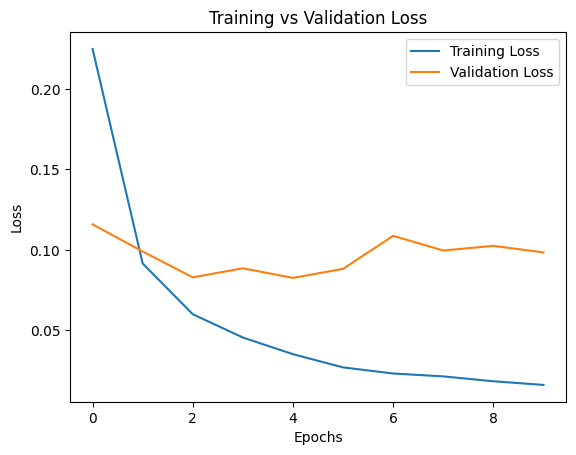

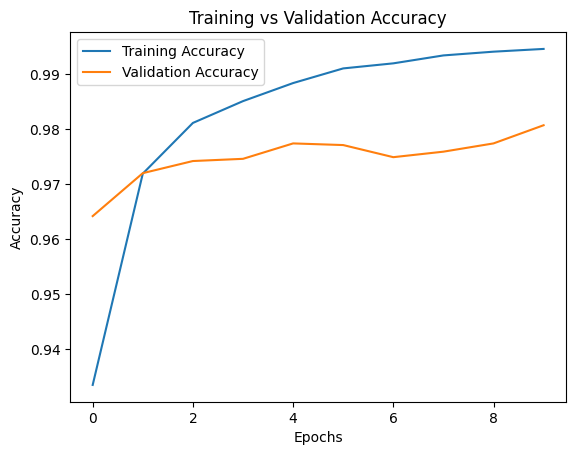

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss,test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9805 - loss: 0.0916
0.0827353224158287 0.9818999767303467


In [ ]:
predictions = model.predict(x_test)
print(predictions[0])  # Output the prediction for the first image

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[3.1755075e-16 1.6688340e-11 1.5936096e-11 1.1938830e-09 2.9054930e-18
 1.6323983e-17 2.3671541e-19 1.0000000e+00 2.8342857e-15 3.3719076e-08]


In [ ]:
predicted_class = predictions.argmax(axis=-1)  # Get the class with the highest probability
print(predicted_class[0])  # Predicted class for the first image

7


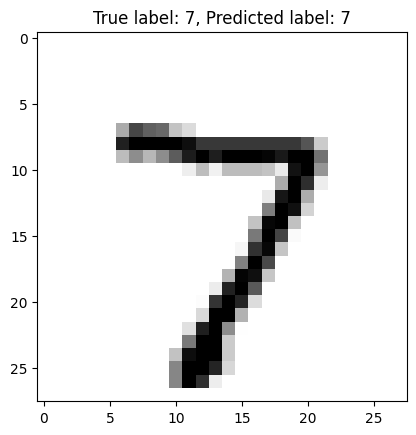

In [ ]:
import matplotlib.pyplot as plt

# Display an image from the test set
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title(f"True label: {y_test[0]}, Predicted label: {predicted_class[0]}")
plt.show()